In [8]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#load Dataset
df=pd.read_csv(r"C:\Users\Abel\Downloads\Fraud_check.csv")

In [10]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<AxesSubplot:>

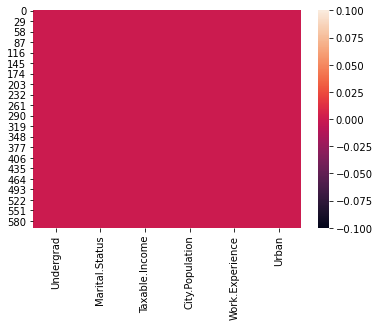

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

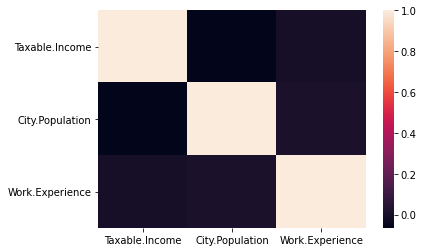

In [13]:
#visualize correlation
sns.heatmap(df.corr())

In [15]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [45]:
df.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          99619           86896            29               NO       1
NO         Single          26101           112774           13               NO       1
                           24557           32450            19               YES      1
                           23884           111105           8                YES      1
                           22258           63622            17               NO       1
                                                                                     ..
YES        Married         26972           86169            8                NO       1
                           26793           162777           7                NO       1
                           26741           176050           20               NO       1
                           26679           79683            26               NO       1
NO         Divorced        10329     

In [46]:
df.shape

(600, 6)

In [16]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [19]:
#segregating dependent and independent variable
input1=df.iloc[:,0:1]
input2=df.iloc[:,3:]
x=pd.concat([input1,input2],axis=1)
y=df.iloc[:,2]


0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [21]:
#converting categorical to numerical
x=pd.get_dummies(x)
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,50047,10,1,0,0,1
1,134075,18,0,1,0,1
2,160205,30,1,0,0,1
3,193264,15,0,1,0,1
4,27533,28,1,0,1,0
...,...,...,...,...,...,...
595,39492,7,0,1,0,1
596,55369,2,0,1,0,1
597,154058,0,1,0,0,1
598,180083,17,0,1,1,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [23]:
#splitting into train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [24]:
#fitting the model
dr=DecisionTreeRegressor()
model=dr.fit(x_train,y_train)

In [25]:
#custom defining function for high sale and low sale
def tax(pred):
    for i in y_pred:
        if i <= 30000:
            print ('Risky')     
        else:
            print ('Good')
    return 

In [26]:
#prediction
y_pred=model.predict(x_test)
tax(y_pred)

Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Risky
Risky
Risky
Risky
Risky
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Risky
Good
Risky
Risky
Good
Good
Good
Good
Good
Good
Risky
Risky
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Risky


In [27]:
#accuracy
rmse=np.sqrt(np.mean(y_test-y_pred)**2)
rmse

2671.241666666667

[Text(0.5, 0, 'Predicted')]

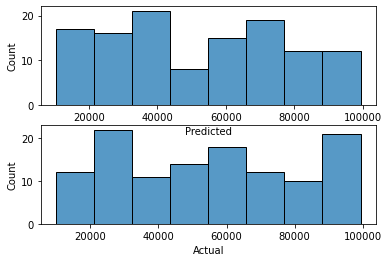

In [38]:

plt.subplot(212)
ax=sns.histplot(y_test)
ax.set(xlabel='Actual')

plt.subplot(211)
ay=sns.histplot(y_pred)
ay.set(xlabel='Predicted')